# I.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def stationary_distribution(omega, theta, eps):
    while np.linalg.norm(omega.dot(theta) - omega) > eps:
        omega = omega.dot(theta)
    return omega

In [3]:
def expected_u(s, lmbd):
    return s / lmbd

In [4]:
def expected_s(lmbd, mu):
    return lmbd / (mu - lmbd)

In [5]:
# коэффициенты использования систем
def get_psi(lmbds, kappa, mu):
    psi = np.zeros(L)
    for i in range(L):
        psi[i] = lmbds[i]/(kappa[i]*mu[i])
    return psi

In [6]:
def get_properties(L, N, mu, theta):
    omega = np.array([0.3, 0.4, 0, 0, 0, 0.3, 0])
    eps = 0.0001
    omega = stationary_distribution(omega, theta, eps)
    
    # м.о. числа требований в системах
    s = np.zeros((N+1, L))
    # м.о. длительности пребывания требований в системах
    u = np.zeros((N+1, L))
    # м.о. длительности ожидания требований в очереди системы
    w = np.zeros(L)
    # м.о. числа требований, ожидающих обслуживание в очереди системы
    b = np.zeros(L)
    # м.о. числа занятых приборов в системах
    h = np.zeros(L)
    # интенсивность входящего потока требований в системы
    lmbds = np.zeros(L)
    # коэффициенты использования систем
    psi = np.zeros(L)
    
    for Y in range(1, N + 1):
        for i in range(L):
            u[Y][i] = 1 / mu[i] * (s[Y-1][i] + 1)
        for i in range(L):
            summa = 0
            for j in range(L):
                summa += omega[j] * u[Y][j]
            s[Y][i] = omega[i] * u[Y][i] * Y / summa

    for i in range(L):
        w[i] = u[N][i] - (1 / mu[i])
        b[i] = s[N][i] * w[i] / u[N][i]
        h[i] = s[N][i] - b[i]
        lmbds[i] = h[i] * mu[i]
        psi[i] = lmbds[i] / mu[i]
            
    return [s[N], u[N], lmbds, psi]

In [26]:
def check(m):
    delta = 0.0001
    for i in range(1, len(m)):
        if abs(m[0] - m[i]) > delta:
            return True
    return False

In [11]:
L = 7
N = 14 # число требований в сети
mu = np.array([14, 8, 13, 4, 5, 12, 3])
theta = np.array([[0, 0.3, 0, 0.1, 0, 0.3, 0.3],
                  [0, 0, 0.5, 0, 0, 0.2, 0.3],
                  [0.4, 0.3, 0, 0, 0.2, 0, 0.1],
                  [0.4, 0, 0, 0.1, 0, 0.2, 0.3],
                  [0, 0, 0.1, 0.1, 0, 0.5, 0.3],
                  [0, 0, 0, 0.9, 0.1, 0, 0],
                  [0, 0, 0, 0.6, 0.2, 0.1, 0.1]])

In [12]:
# нахождение вектора omega
omega = np.array([0.3, 0.4, 0, 0, 0, 0.3, 0])
eps = 0.0001
omega = stationary_distribution(omega, theta, eps)
print(f'Omegas: {omega},\nCheck (~1): {sum(omega)}')

Omegas: [0.14528435 0.0535288  0.03319389 0.32997213 0.06414535 0.17251681
 0.20135867],
Check (~1): 1.0000000000000002


In [13]:
# интенсивность обслуживания во 2-й системе
mu_to_plot = np.linspace(1, 50, 20)
s_list = []
u_list = []
lmbd_list = []
for mu_2 in mu_to_plot:
    mu[1] = mu_2
    properties = get_properties(L, N, mu, theta)
    s_list.append(properties[0])
    u_list.append(properties[1])
    lmbd_list.append(properties[2])
s_list = np.array(s_list)
s_list = np.transpose(s_list)
u_list = np.array(u_list)
u_list = np.transpose(u_list)
lmbd_list = np.array(lmbd_list)
lmbd_list = np.transpose(lmbd_list)

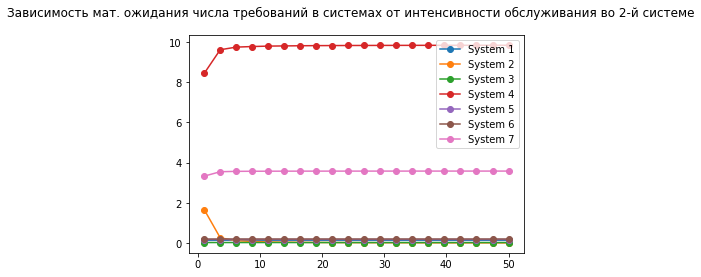

In [14]:
for i, s in enumerate(s_list):
    plt.plot(mu_to_plot, s, 'o-', label=f'System {str(i + 1)}')
plt.suptitle(f'Зависимость мат. ожидания числа требований в системах от интенсивности обслуживания во 2-й системе')
plt.legend()
plt.show()

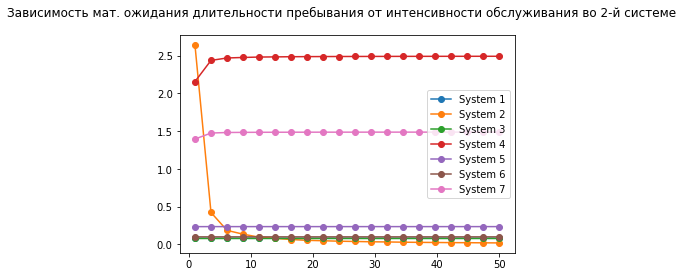

In [15]:
for i, u in enumerate(u_list):
    plt.plot(mu_to_plot, u, 'o-', label=f'System {str(i + 1)}')
plt.suptitle(f'Зависимость мат. ожидания длительности пребывания от интенсивности обслуживания во 2-й системе')
plt.legend()
plt.show()

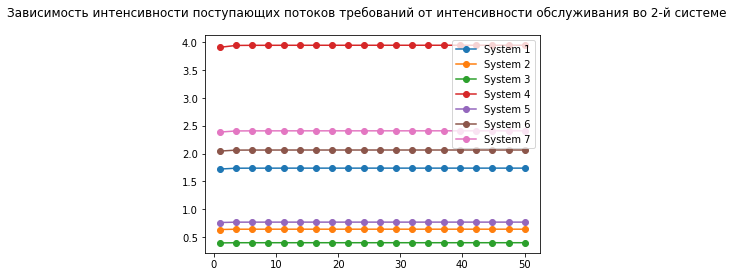

In [16]:
for i, lmbds in enumerate(lmbd_list):
    plt.plot(mu_to_plot, lmbds, 'o-', label=f'System {str(i + 1)}')
plt.suptitle(f'Зависимость интенсивности поступающих потоков требований от интенсивности обслуживания во 2-й системе')
plt.legend()
plt.show()

In [17]:
# интенсивность обслуживания в 4-й системе
num = 4
mu_to_plot = np.linspace(1, 50, 20)
s_list = []
u_list = []
lmbd_list = []
for mu_4 in mu_to_plot:
    mu[num - 1] = mu_4
    properties = get_properties(L, N, mu, theta)
    s_list.append(properties[0])
    u_list.append(properties[1])
    lmbd_list.append(properties[2])
s_list = np.array(s_list)
s_list = np.transpose(s_list)
u_list = np.array(u_list)
u_list = np.transpose(u_list)
lmbd_list = np.array(lmbd_list)
lmbd_list = np.transpose(lmbd_list)

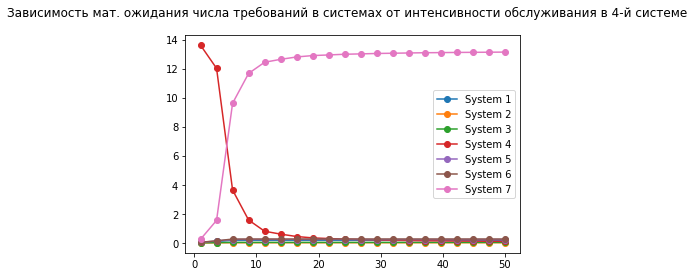

In [18]:
for i, s in enumerate(s_list):
    plt.plot(mu_to_plot, s, 'o-', label=f'System {str(i + 1)}')
plt.suptitle(f'Зависимость мат. ожидания числа требований в системах от интенсивности обслуживания в 4-й системе')
plt.legend()
plt.show()

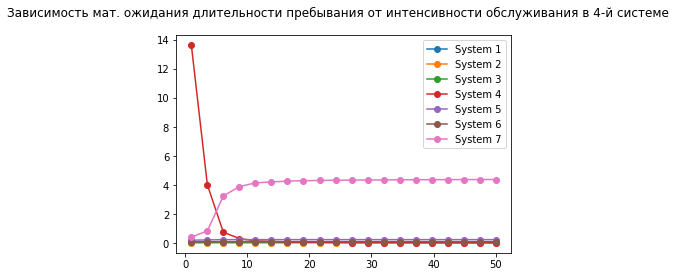

In [19]:
for i, u in enumerate(u_list):
    plt.plot(mu_to_plot, u, 'o-', label=f'System {str(i + 1)}')
plt.suptitle(f'Зависимость мат. ожидания длительности пребывания от интенсивности обслуживания в 4-й системе')
plt.legend()
plt.show()

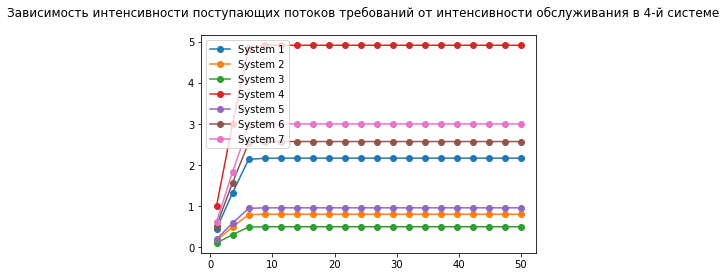

In [20]:
for i, lmbds in enumerate(lmbd_list):
    plt.plot(mu_to_plot, lmbds, 'o-', label=f'System {str(i + 1)}')
plt.suptitle(f'Зависимость интенсивности поступающих потоков требований от интенсивности обслуживания в 4-й системе')
plt.legend()
plt.show()

# II.

## A)

In [32]:
L = 7
N = 14 # число требований в сети
mu = np.array([1, 1, 1, 1, 1, 1, 1])
theta = np.array([[0, 0, 0.4, 0, 0.6, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0],
                  [0, 0.1, 0, 0, 0, 0.9, 0],
                  [0, 0, 0, 0, 0, 0, 1],
                  [0, 0.4, 0, 0.6, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0]])

In [33]:
omega = np.array([0, 0, 0.5, 0, 0, 0.5, 0])
eps = 0.0001
omega = stationary_distribution(omega, theta, eps)
print(f'Omegas: {omega},\nCheck (~1): {sum(omega)}')

Omegas: [0.24994399 0.07002214 0.09999339 0.09002847 0.14999008 0.24999992
 0.09002202],
Check (~1): 1.0000000000000002


In [36]:
h = 0.01
index = 0
properties = get_properties(L, N, mu, theta)
while check(properties[0]):
    mu[index % 7] += h
    index += 1
    properties = get_properties(L, N, mu, theta)
    print(properties[0])
print(f"\nВектор mu: {mu}\nМ.о. числа требований в системах: {properties[0]}")

[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.4850

 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56

 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56

 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56

 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56

 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56

 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56

 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56

[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.48500458 1.17379627 5.46942635
 0.4849886 ]
[5.47636205 0.34122797 0.56919419 0.4850

KeyboardInterrupt: 